In [45]:
import os
import sys
sys.path.insert(0, '/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/src')
from train import train_models, build_summary_table

import pandas as pd

In [46]:
#load cleaned datasets

df_inliers = pd.read_csv("../data/processed_inliers.csv")
df_outliers = pd.read_csv("../data/processed_outliers.csv")

In [47]:
reports, metrics_data = train_models(df_inliers, df_outliers)

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

In [49]:
summary_df = build_summary_table(reports, metrics_data)

                       F1 (Fraud)  Recall (Fraud)  Precision (Fraud)  Accuracy  ROC AUC
Model 1: LR Inliers          0.59            0.51               0.70      0.83     0.84
Model 2: XGB Inliers         0.64            0.70               0.59      0.82     0.82
Model 3: LR Outliers         0.42            0.31               0.67      0.74     0.80
Model 4: XGB Outliers        0.77            0.77               0.77      0.86     0.94


ROC-AUC checks model quality across all thresholds, making it threshold-independent.  
A good model has high TPR and low FPR across most thresholds → AUC close to 1.

## 🔬 Feature selection experiment (did not improve metrics, so skipped)

In [50]:
#from visualization import plot_xgb_importance, get_feature_names_from_column_transformer
#import joblib

#model2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model2_xgb_inliers.pkl")
#preprocessor2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor2_inliers.pkl")
#feature_names2 = get_feature_names_from_column_transformer(preprocessor2)
#plot_xgb_importance(model2, feature_names=feature_names2, max_features=40, title="Top Features (XGB Inliers)")

#model4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model4_xgb_outliers.pkl")
#preprocessor4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor2_inliers.pkl")
#feature_names4 = get_feature_names_from_column_transformer(preprocessor4)
#plot_xgb_importance(model4, feature_names=feature_names4, max_features=40, title="Top Features (XGB Outliers)")

In [51]:
#from feature_selection import get_important_features_from_xgb

#important_feats = get_important_features_from_xgb(model2, feature_names2, threshold=0.1)
#df_inliers = df_inliers[important_feats + ['fraud_reported']]

#important_feats = get_important_features_from_xgb(model4, feature_names4, threshold=0.1)
#df_outliers = df_outliers[important_feats + ['fraud_reported']]

#reports, metrics_data = train_models(df_inliers, df_outliers)
#summary_df = build_summary_table(reports, metrics_data)

## Model Intepretation (model 2 and model 4 - both XGBoost)

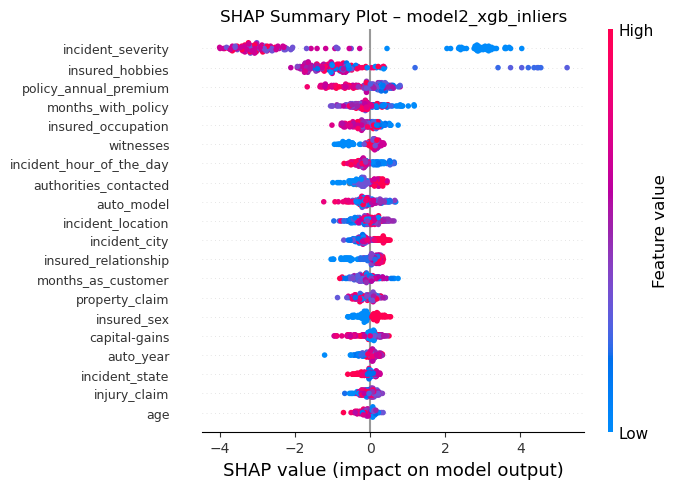

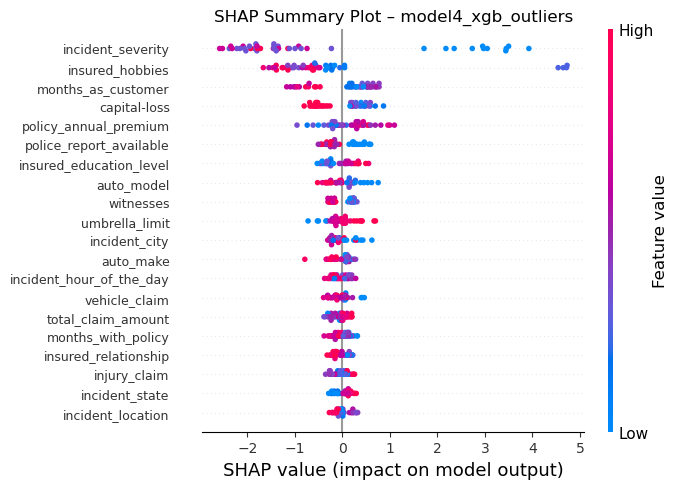

In [52]:
from visualization import plot_xgb_importance, get_feature_names_from_column_transformer, explain_model_with_shap
import joblib

model2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model2_xgb_inliers.pkl")
X2_test = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/X2_test_inliers.pkl")
preprocessor2 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor2_inliers.pkl")
feature_names2 = get_feature_names_from_column_transformer(preprocessor2)
explain_model_with_shap(model2,X2_test,feature_names2, model_name="model2_xgb_inliers")

model4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/model4_xgb_outliers.pkl")
X4_test = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/X4_test_outliers.pkl")
preprocessor4 = joblib.load("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/models/preprocessor4_outliers.pkl")
feature_names4 = get_feature_names_from_column_transformer(preprocessor4)
explain_model_with_shap(model4,X4_test,feature_names4, model_name="model4_xgb_outliers")

### feature importance - Model 2 for inliers

The five most siginificant features that lead to fraud prediction:  
- incident_severity (categorial)  
- insured_hobbies (categorial)  
- policy_annual_premium (numerical)
- months_with_policy (numerical)
- insured_occupation (categorial)  

What do those colored dots mean?   
- blue dots means low feature values  
- navy dots means mid low feature values  
- purple dots means middle feature values
- magenta dots means mid high feature values  
- red dots means high feature values  

In [53]:
from visualization import print_category_encoding

print_category_encoding(preprocessor2, 'incident_severity')
print_category_encoding(preprocessor2, 'insured_hobbies')
print_category_encoding(preprocessor2, 'insured_occupation')

Encoding for 'incident_severity': ['major damage' 'minor damage' 'total loss' 'trivial damage']
Encoding for 'insured_hobbies': ['base-jumping' 'basketball' 'board-games' 'bungie-jumping' 'camping'
 'chess' 'cross-fit' 'dancing' 'exercise' 'golf' 'hiking' 'kayaking'
 'movies' 'paintball' 'polo' 'reading' 'skydiving' 'sleeping'
 'video-games' 'yachting']
Encoding for 'insured_occupation': ['adm-clerical' 'armed-forces' 'craft-repair' 'exec-managerial'
 'farming-fishing' 'handlers-cleaners' 'machine-op-inspct' 'other-service'
 'priv-house-serv' 'prof-specialty' 'protective-serv' 'sales'
 'tech-support' 'transport-moving']


In [54]:
from visualization import get_category_range, get_numerical_range

#blue dots in "incident_severity" mean low feature values
print("incident_severity:")
get_category_range(preprocessor2, "incident_severity", "low") 

#navy dots in "insured_hobbies" mean midlow feature values
print("insured_hobbies:")
get_category_range(preprocessor2, "insured_hobbies", "midlow") 

#mixed blue and purple dots in "policy_annual_premium" mean low to middle feature values
print("policy_annual_premium:")
get_numerical_range(preprocessor2, 'policy_annual_premium', 'low')
get_numerical_range(preprocessor2, 'policy_annual_premium', 'midlow')
get_numerical_range(preprocessor2, 'policy_annual_premium', 'middle')

#blue dots in "months_with_policy" mean low feature values
print("months_with_policy:")
get_numerical_range(preprocessor2, 'months_with_policy', 'low')

#blue dots in "insured_occupation" mean low feature values
print("insured_occupation:")
get_category_range(preprocessor2, "insured_occupation", "low")

incident_severity:
['major damage']
insured_hobbies:
['camping' 'chess' 'cross-fit' 'dancing']
policy_annual_premium:
(-inf, 897.0931948361626)
(897.0931948361626, 1137.0157273657696)
(1137.0157273657696, 1376.9382598953766)
months_with_policy:
(-inf, 24.304227094632324)
insured_occupation:
['adm-clerical' 'armed-forces']


### feature importance - Model 4 for outliers

The five most siginificant features that lead to fraud prediction:  
- insured_hobbies (categorial)  
- incident_severity (categorial)  
- months_as_customer (numerical)  
- capital-loss (numerical)  
- policy_annual_premium (numerical)

What do those colored dots mean?   
- blue dots means low feature values  
- navy dots means mid low feature values  
- purple dots means middle feature values
- magenta dots means mid high feature values  
- red dots means high feature values  

In [55]:
from visualization import print_category_encoding

print_category_encoding(preprocessor4, 'incident_severity')
print_category_encoding(preprocessor4, 'insured_hobbies')

Encoding for 'incident_severity': ['major damage' 'minor damage' 'total loss' 'trivial damage']
Encoding for 'insured_hobbies': ['base-jumping' 'basketball' 'board-games' 'bungie-jumping' 'camping'
 'chess' 'cross-fit' 'dancing' 'exercise' 'golf' 'hiking' 'kayaking'
 'movies' 'paintball' 'polo' 'reading' 'skydiving' 'sleeping'
 'video-games' 'yachting']


In [56]:
from visualization import get_category_range, get_numerical_range

#blue dots in "incident_severity" mean low feature values
print("incident_severity:")
get_category_range(preprocessor4, "incident_severity", "low") 

#navy dots in "insured_hobbies" mean midlow feature values
print("insured_hobbies:")
get_category_range(preprocessor4, "insured_hobbies", "midlow") 

#mixed blue and purple dots in "months_as_customer" mean low to middle feature values
print("months_as_customer:")
get_numerical_range(preprocessor2, 'months_as_customer', 'low')
get_numerical_range(preprocessor2, 'months_as_customer', 'midlow')
get_numerical_range(preprocessor2, 'months_as_customer', 'middle')

#mixed blue and purple dots in "capital-loss" mean low to middle feature values
print("capital-loss:")
get_numerical_range(preprocessor2, 'capital-loss', 'low')
get_numerical_range(preprocessor2, 'capital-loss', 'midlow')
get_numerical_range(preprocessor2, 'capital-loss', 'middle')

#mixed red and purple dots in "policy_annual_premium" mean midhigh to high feature values
print("policy_annual_premium:")
get_numerical_range(preprocessor2, 'policy_annual_premium', 'midhigh')
get_numerical_range(preprocessor2, 'policy_annual_premium', 'high')

incident_severity:
['major damage']
insured_hobbies:
['camping' 'chess' 'cross-fit' 'dancing']
months_as_customer:
(-inf, 102.29899202635468)
(102.29899202635468, 195.3353327985938)
(195.3353327985938, 288.37167357083297)
capital-loss:
(-inf, -68692.54980486241)
(-68692.54980486241, -40637.13443601571)
(-40637.13443601571, -12581.719067169002)
policy_annual_premium:
(1376.9382598953766, 1616.8607924249836)
(1616.8607924249836, inf)
